In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy. integrate import odeint

# Модель Вольтерра–Лотке 

Рассмотрим модель хищник-жертва Вольтера-Лотке. Она описывает простую экосистему:
 \begin{cases}
    \begin{equation}
    \frac{dr}{dt}=\alpha r - \gamma r f 
    \\
    \frac{df}{dt}=-\beta f + \gamma r f
    \end{equation}
 \end{cases}
 \begin{cases}
    r(0) = r_0 \\ 
    f(0) = f_0
 \end{cases}
 
 Где $\alpha$ коэффицент рождаемости жертв, а $\beta$ - смертности хищников. $\gamma$ выступает в роли коэффицента встреч с хищниками для жертв и коэффицентом прироста за встречу для хищников.$r_0$ и $f_0$ - начальные значения. В моем случае $\alpha = 2$, $\beta = 1$ , a $\gamma$ задается вручную.
 
 Как можно заметить, модель является системой диференциальных уравнений первого порядка, разрешенных относительно производных. Чтобы ее решить, для начала создадим функцию, которая получает на входе массив из начальных значений $start$, линейное пространство $t$ и параметр $\gamma$,а возвращать правую часть уравнения.

In [2]:
def f(start, t, a):
    r, f  = start
    return [2*r-a*r*f, -f + a*r*f]

Функция создана, тепер напишим функцию, которая будет решать систему и рисовать графики $f(t)$ и $r(t)$ и фазовую траекторию в плоскости $(r, f)$. Решаться система будет с помощью функции $odeint$ модуля $scipy.integrate$.

In [3]:
def lot(f, r0, f0, a):
    
    t0 = 1
    T  = 20

    t  = np.linspace(t0, T, 500)

    start = [r0,f0]
    w = odeint(f, start, t, args = (a,))
    r = w[:,0]
    f = w[:,1]
     
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
    plt.plot(t, r, linewidth=1.5,label = 'r(t)')
    plt.plot(t, f, linewidth=1.5,label = 'f(t)')
    plt.xlabel('t (Время)')
    plt.ylabel('Количество особей')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(r,f)
    pass
    
    return [r, f]

## Тестирование системы

Теперь посмотрим на работу системы.Сначала попробуем сделать начальное значение хищников нулевым, а в следующем сделаем то же самое с жертвами.

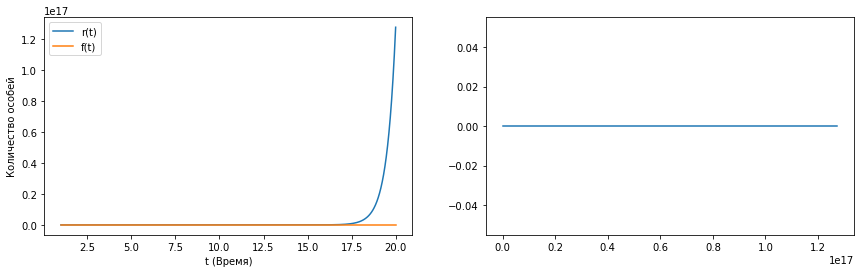

In [4]:
r0 = 4
f0 = 0
a = 0.05
phasePort = (lot(f, r0, f0,a))

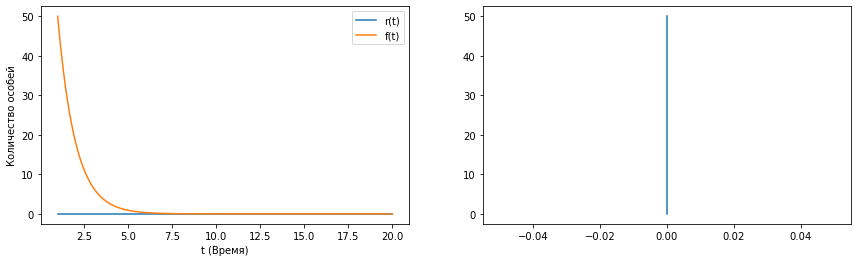

In [5]:
r0 = 0
f0 = 50
a = 0.01
phasePort += (lot(f, r0, f0,a))

Как можем видеть, в первом случае количество жертв экспоненциалиально растет, а во втором - количество хищников падает таким же образом. Следовательно система работает. Теперь проведем несколько итераций с ненулевыми значениями.

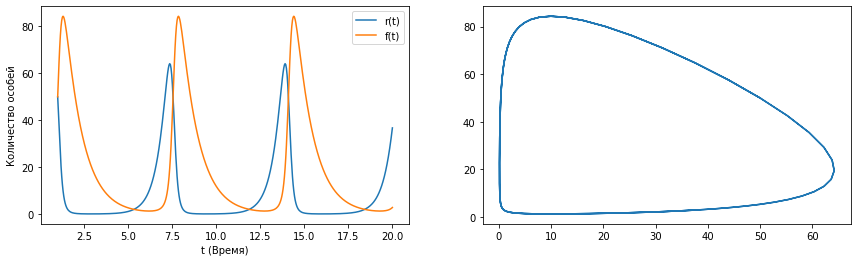

In [6]:
r0 = 50
f0 = 50
a = 0.1
phasePort += (lot(f, r0, f0,a))

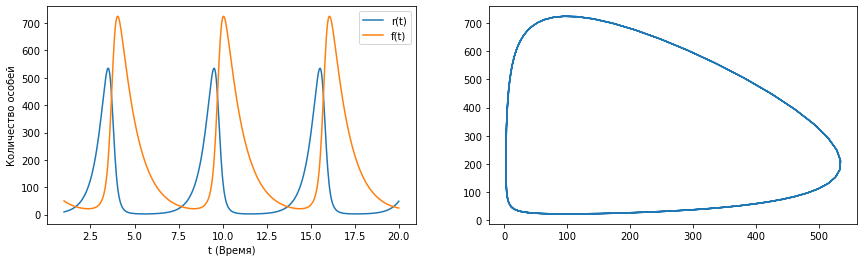

In [7]:
r0 = 10
f0 = 50
a = 0.01
phasePort += (lot(f, r0, f0,a))

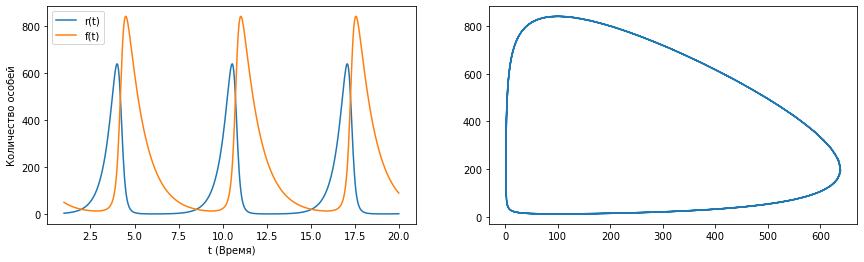

In [8]:
r0 = 4
f0 = 50
a = 0.01
phasePort += (lot(f, r0, f0,a))

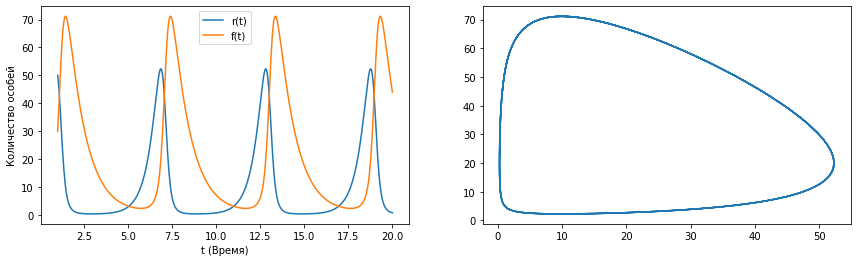

In [9]:
r0 = 50
f0 = 30
a = 0.1
phasePort += (lot(f, r0, f0,a))

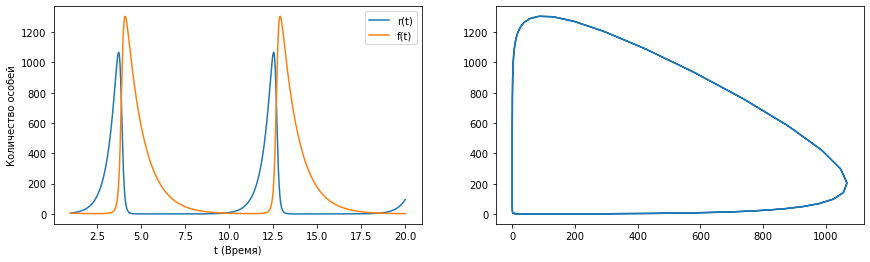

In [10]:
r0 = 6
f0 = 5
a = 0.01
phasePort += (lot(f, r0, f0,a))

Как можем заметить, при различных значениях график ведет себя по-разному(изменяется числинность особей, период). Теперь взглянем на фазовый портрет, который составлен исходя из данных тестов и хранится в phasePort.

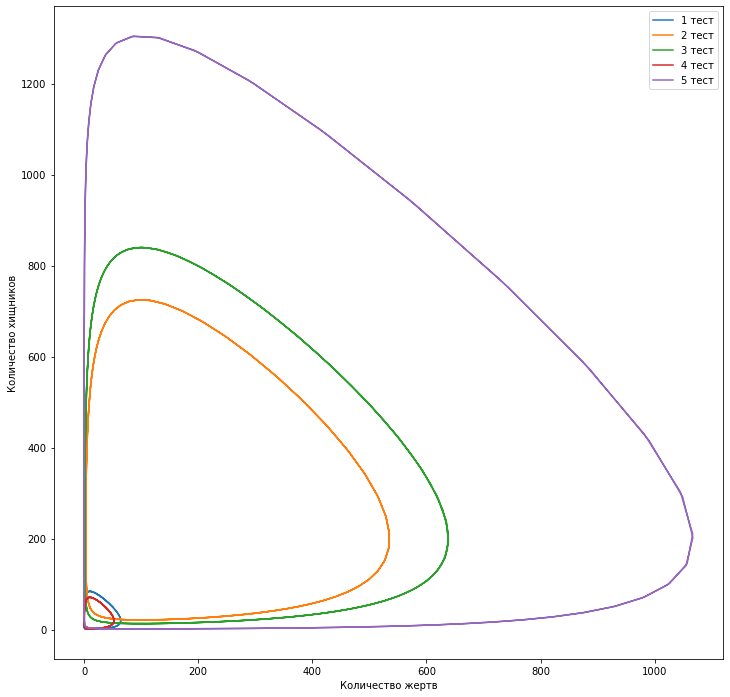

In [11]:
fig, port  = plt.subplots()

port.plot(phasePort[4], phasePort[5], linewidth=1.5,label = '1 тест')
port.plot(phasePort[6], phasePort[7], linewidth=1.5,label = '2 тест')
port.plot(phasePort[8], phasePort[9], linewidth=1.5,label = '3 тест')
port.plot(phasePort[10], phasePort[11], linewidth=1.5,label = '4 тест')
port.plot(phasePort[12], phasePort[13], linewidth=1.5,label = '5 тест')
port.legend()

port.set_xlabel('Количество жертв')
port.set_ylabel('Количество хищников')

fig.set_figwidth(12)
fig.set_figheight(12)

pass


Рассмотрим данный портрет. Каков его смысл? Когда количество жертв достигает максимума, оно начинает падать , а количество хищников расти. Когда жертвы вымирают, начинают вымирать и хищники из-за отсутствия пищи, после чего цикл повторяется. Размеры графиков напрямую зависят от коэффицента встреч хищников и жертв. Так, графики тестов 1 и 4 маленькие из-за того, что коэффицент встреч большой и равен 0.1, когда у остальных он равен 0.01. Таким образом, если этот коэфицент уменьшить, то вероятность их встречи уменьшится, и жертвы смогут размножаться дольше и хищники в свою очередь тоже. 

## Вывод

Данная модель может наглядно показать простую экосистему, которую можно измерять в зависимости от потребности в построении, а фазовый портрет показывает зависимость количества хищников от количества жертв.